In [46]:
import os
import torch
import torchvision
import simple_train
from simple_train import PesmodOpticalFlowDataset, get_transform
import utils


In [47]:
batch_size=1
dataset = PesmodOpticalFlowDataset(
    os.path.join('INPUT', 'train'), get_transform(train=True))
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)


Filtering


In [48]:
dataiter = iter(data_loader)
images, labels = dataiter.next()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


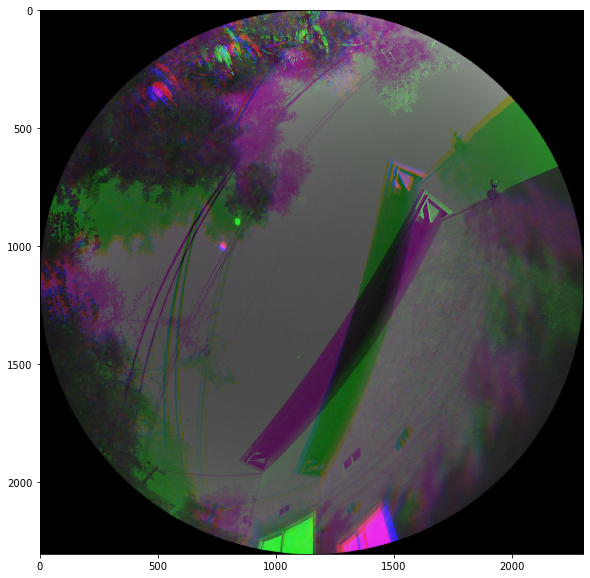

In [49]:
import imgaug
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

for image, target in zip(images,labels):
    optical_np=image[:3]
    optical = np.moveaxis(optical_np, 0, -1)
    bbs = imgaug.BoundingBoxesOnImage.from_xyxy_array(
        target['boxes'], optical.shape)
    optical = bbs.draw_on_image(optical, size=2, color=[0, 0, 255])
    plt.figure(figsize=(10, 10))
    plt.imshow(optical, interpolation='nearest')
    plt.show()
    #optical = Image.fromarray(np.uint8(cm.gist_earth(optical_tensor)*255))
    #optical.show()
    #of=image[3:]
